# Qutip Single Qubit error
In this notebook, we charecterise the error generated by qutip sesolve() method and integerate.ode method. The example done in here can be found in "A Modern Approach to Quantum Mechanics," Section 4.3. F

## Time Independent Case

irst we discuss the time independent Hamiltonian. The Hamiltonian is defined as:
\begin{equation}
    H = \frac{\hbar w_0 \sigma_z}{2}
\end{equation}

The unitary is:
\begin{equation}
U(t) = e^{-i\hat Ht/h} = e^{-i\hat \sigma_z w_0 \hbar t/2\hbar} = e^{-i\hat \sigma_z \phi/2} =  R(\phi \hat k) = \begin{bmatrix}
            e^{-i\phi/2} & 0\\
            0 & e^{i \phi/2} 
        \end{bmatrix} = 
        \begin{bmatrix}
            e^{-iw_0 t/2} & 0\\
            0 & e^{i w_0 t/2} 
        \end{bmatrix}
\end{equation}
### Exact Solution

The initial state of the system is the state $|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)= \ \frac{1}{\sqrt{2}}\begin{bmatrix}1 \\
1\end{bmatrix}$. 
The evolution equation is then: 
\begin{equation}
    \begin{bmatrix}
        y_0(t) \\
        y_1(t)
    \end{bmatrix} = \frac{1}{\sqrt2}
    \begin{bmatrix}
        e^{-iw_0 t/2} & 0\\
        0 & e^{i w_0 t/2} 
    \end{bmatrix}
    \begin{bmatrix}
        1 \\
        1
    \end{bmatrix}
\end{equation}

The following code will generate the state of the system at 0.1 seconds interval between 0 and 10 seconds.



In [68]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

from scipy.integrate import ode

# for analytical exponentiation
from scipy.linalg import expm 
print("done")

done


Simulation Parameters:

In [69]:
w = 1
times = []
t = 0
dt = 0.1
max_time = 10
while t < max_time-dt:
    times.append(t)
    t = t + dt

In [120]:
initial_state = (1/np.sqrt(2))*np.array([[1], [1]])
w = 1
exact_states = []
for t in times:
    unitary = np.array([[np.exp(-1j*w*t/2), 0], [0, np.exp(1j*w*t/2) ]])
    exact_states.append(np.matmul(unitary, initial_state))
print("done generating exact solution")

done generating exact solution


### Qutip Simulation 

In [121]:
initial_state = (qutip.basis(2, 0) + (1+0j)*qutip.basis(2, 1)).unit()
h = w*sigmaz()/2
result = sesolve(h, initial_state, times)
qutip_states = result.states
print("done generating qutip solution")

done generating qutip solution


### Integerate.ode simulation

Integerate.ode will estimate the value of a function given its derivative in a similar way to Euler's method. So, we must supply $\frac{dy}{dt}$. We know that: \begin{equation} \phi(t) = e^{\frac{-iHt}{h}}\phi(0) \end{equation}

Taking the derivative gives:
 \begin{equation} \frac{d\phi}{dt} = \frac{-iH}{\hbar}e^{\frac{-iHt}{\hbar}}\phi(0) \end{equation}
 
But $\phi(t) = e^{\frac{-iHt}{\hbar}}\phi(0)$, then: 
\begin{equation} \frac{d\phi}{dt} = \frac{-iH}{\hbar}\phi(t) = \frac{-iw_0 \sigma_z}{2}\phi(t) \end{equation}

Let $\phi(t) = \begin{bmatrix} c_0\\ c_1\end{bmatrix}$ and $\frac{d\phi}{dt} = \begin{bmatrix} c_0'\\ c_1'\end{bmatrix}$, then:

\begin{equation} \begin{bmatrix} c_0'\\ c_1'\end{bmatrix}  = \frac{-iw_0}{2}\begin{bmatrix} c_0\\ -c_1\end{bmatrix} \end{equation}



In [124]:

def dy_dt(t, y):
    return np.array([[-1j*w*y[0]/2], [1j*w*y[1]/2]])


initial_state = (1/np.sqrt(2))*np.array([[1], [1]])
t0 = 0

# set the integrater
r = ode(dy_dt).set_integrator('zvode' )
r.set_initial_value(initial_state, t0)

ode_states = [initial_state]
while r.successful() and r.t < max_time - dt - 0.01:# here added the 0.01 because of machine precision as rt would 9.899
                                                    # which is less than 9.9 so it will loop one more time producing an 
                                                    # extra unnecessery point
    ode_states.append(r.integrate(r.t + dt))
print("done generating integerate.ode solution")

done generating integerate.ode solution


## Error Analysis
Here, we display the error analysis for the time independent case. The error is defined as the amplitude of the difference between matching vectors at each time step. 


In [125]:
qutip_error = []
ode_error = []
for i in range(len(times)):
    y = []
    y.append(qutip_states[i][0] - exact_states[i][0])
    y.append(qutip_states[i][1] - exact_states[i][1])
    qutip_error.append(np.abs(np.vdot(y, y)))
    ode_error.append(np.abs(np.vdot(ode_states[i] - exact_states[i], ode_states[i] - exact_states[i])))
print("done finding error")

done finding error


Text(0.5, 1.0, 'Error in sesolve() and Integerate.ode for time-independent hamiltonian for one qubit ')

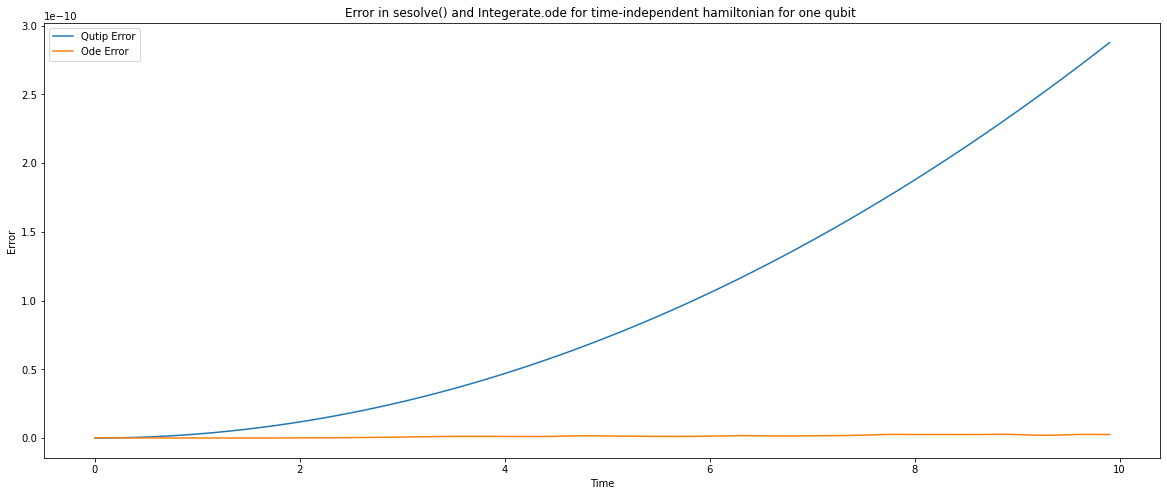

In [126]:
p = plt.figure(1)
p.set_figwidth(20)
p.set_figheight(8)
p = plt.subplot()
p.plot(times, qutip_error) 
p.plot(times, ode_error)
p.legend(("Qutip Error", "Ode Error",))
p.set_xlabel('Time') 
p.set_ylabel('Error') 
p.set_title("Error in sesolve() and Integerate.ode for time-independent hamiltonian for one qubit ")

Text(0.5, 1.0, 'Error in sesolve() and Integerate.ode for time-independent hamiltonian for one qubit ')

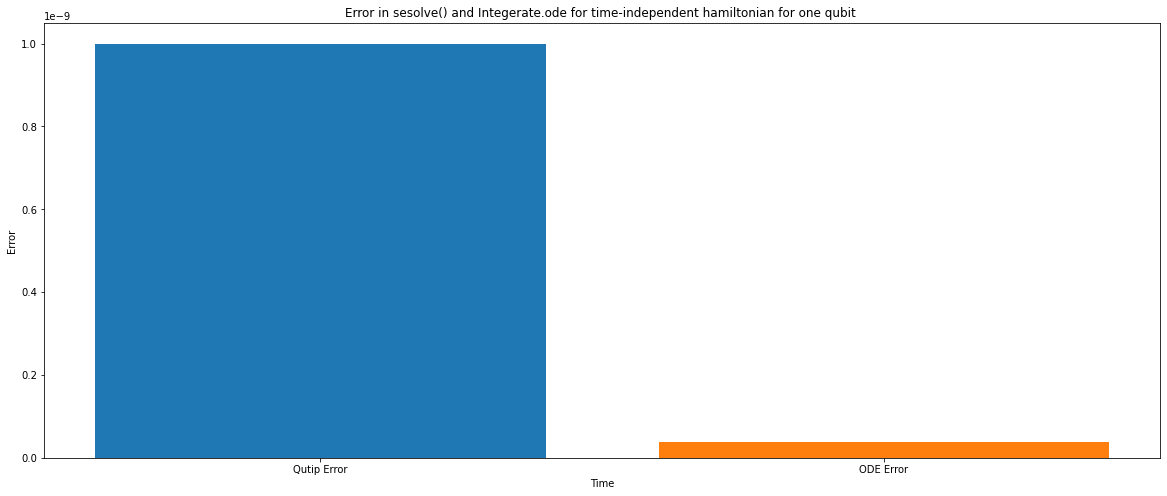

In [116]:
p = plt.figure(1)
p.set_figwidth(20)
p.set_figheight(8)
p = plt.subplot()
p.bar("Qutip Error", np.trapz(qutip_error, times)) 
p.bar("ODE Error", np.trapz(ode_error, times))
p.set_xlabel('Time') 
p.set_ylabel('Error') 
p.set_title("Error in sesolve() and Integerate.ode for time-independent hamiltonian for one qubit ")

While the error in qutip simulation is larger than the ODE error, it is still comparable and acceptable for defaults values of rtol and atol. The largest contribution to the error in the qutip simulation is likeley due to the atol value for large value of points. We expect that this error will be significantly reduced at low value of rtol. In the next graph, we see that it was even less than the ode error for rtol = 0.

done generating qutip solution
done finding error


Text(0.5, 1.0, 'Error in sesolve() and Integerate.ode for time-independent hamiltonian for one qubit ')

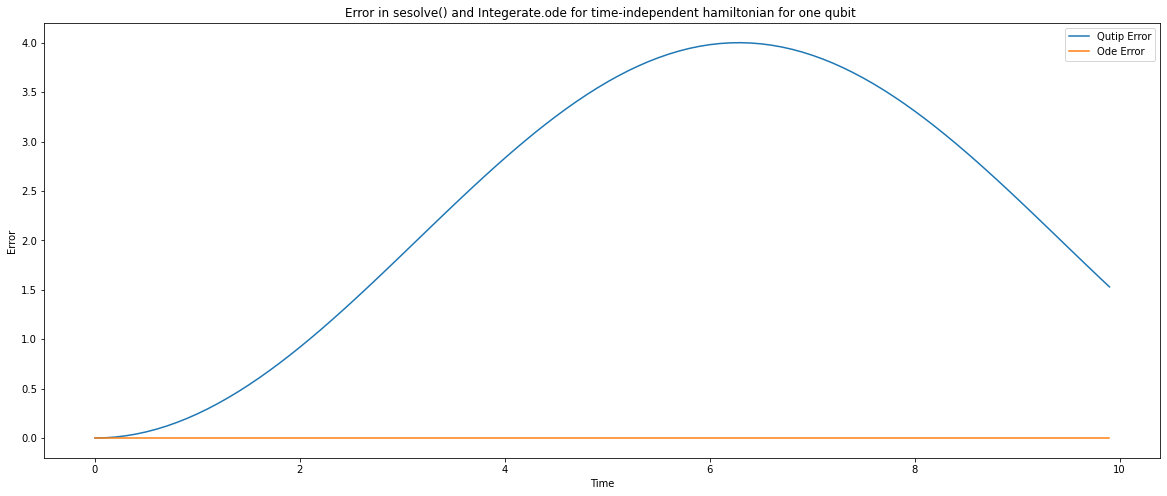

In [127]:
initial_state = (qutip.basis(2, 0) + (1+0j)*qutip.basis(2, 1)).unit()
h = w*sigmaz()/2
options = Options(rtol = 0)
result = sesolve(h, initial_state, times, options = options)
qutip_states = result.states
print("done generating qutip solution")


qutip_error = []
ode_error = []
for i in range(len(times)):
    y = []
    y.append(qutip_states[i][0] - exact_states[i][0])
    y.append(qutip_states[i][1] - exact_states[i][1])
    qutip_error.append(np.abs(np.vdot(y, y)))
    ode_error.append(np.abs(np.vdot(ode_states[i] - exact_states[i], ode_states[i] - exact_states[i])))
print("done finding error")

p = plt.figure(1)
p.set_figwidth(20)
p.set_figheight(8)
p = plt.subplot()
p.plot(times, qutip_error) 
p.plot(times, ode_error)
p.legend(("Qutip Error", "Ode Error",))
p.set_xlabel('Time') 
p.set_ylabel('Error') 
p.set_title("Error in sesolve() and Integerate.ode for time-independent hamiltonian for one qubit ")

# Results
In the N_Qubits_time_independet_Hamiltonian_Simulation notebook, we saw that the error in the sesolve() method was quite large (-two order of magnitude when the expected is -8 order of magnitude for default values of atol and rtol). We also observed that the value of the error decreases with decreasing time step and the error decreases with increasing values of atol and rtol until it reaches a minimum and then start increasing again. These are rather odd results as the expectation is a decreasing error for a decreasing atol and rtol and error independence of the time step. In the process of investigating the cause for these results, we created the Integerate.ODE to test our original expectations using the integerate.ode method, the main integerator of sesolve(). Integerate.ode notebook confirmed the original expectations for error independence of time step and positive correlation between tolerance and error. In this notebook, we investigate the error magnitude for the sesolve() method on simple 1 qubit system. The results shown in here also confirm the original expectaion of the magnitude of error. Next, we investigate the two qubit system again but with a $\sigma_z \otimes \sigma_z$ hamiltonian and a $|++\rangle$ initial state.